In [23]:
import math
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import signal
from scipy import optimize
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import AxesGrid

In [2]:
#get the peak position using 2D Polynomial fit
def GaussianGeneration(params,row,col):
    x_pos=params[0]
    y_pos=params[1]
    sigma=params[2]
    amplitude=params[3]
    background=params[-1]
    gaussian_frame=np.zeros([row,col])
    for i in range(row):
        for j in range(col):
            val = ((j-x_pos)**2+(i-y_pos)**2)/(2*sigma**2)
            gaussian_frame[i,j]+=amplitude*np.exp(-val)
    gaussian_frame=gaussian_frame+background
    return gaussian_frame
def GaussianFitting(original_image,params):
    x_=np.arange(original_image.shape[0])
    y_=np.arange(original_image.shape[1])
    X,Y=np.meshgrid(x_,y_)
    def residuals(fitting_params,x,y):
        gaussian_image=GaussianGeneration(fitting_params,original_image.shape[0],original_image.shape[1])
        return gaussian_image[x,y]-original_image[x,y]
    fit_result=optimize.leastsq(residuals,params,args=(X.flatten(),Y.flatten()))[0]
    return fit_result

In [3]:
def GaussianGenerationPro(params,row,col):
    x_pos=params[0]
    y_pos=params[1]
    sigma1=params[2]
    sigma2=params[3]
    theta=params[4]
    amplitude=params[5]
    background=params[-1]
    gaussian_frame=np.zeros([row,col])
    for i in range(row):
        for j in range(col):
            new_x = (j-x_pos)*np.cos(theta) - (i-y_pos)*np.sin(theta)
            new_y = (j-x_pos)*np.sin(theta) + (i-y_pos)*np.cos(theta)
            val = new_x**2/(2*sigma1**2)+new_y**2/(2*sigma2**2)
            gaussian_frame[i,j]+=amplitude*np.exp(-val)
    gaussian_frame=gaussian_frame+background
    return gaussian_frame
def GaussianFittingPro(original_image,params):
    x_=np.arange(original_image.shape[0])
    y_=np.arange(original_image.shape[1])
    X,Y=np.meshgrid(x_,y_)
    def residuals(fitting_params,x,y):
        gaussian_image=GaussianGenerationPro(fitting_params,original_image.shape[0],original_image.shape[1])
        return gaussian_image[x,y]-original_image[x,y]
    fit_result=optimize.leastsq(residuals,params,args=(X.flatten(),Y.flatten()))[0]
    return fit_result

In [24]:
diff_data = np.load('E:/sample1/defocus/series1/6/data.npy')
#np.save('E:/sample1/defocus/series3/4/sub64.npy',diff_data[96:160,96:160,:,:])
np.shape(diff_data)

(254, 256, 256, 256)

C:\Users\sning\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\sning\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.
  del sys.path[0]


Text(0.5, 1.0, 'image2')

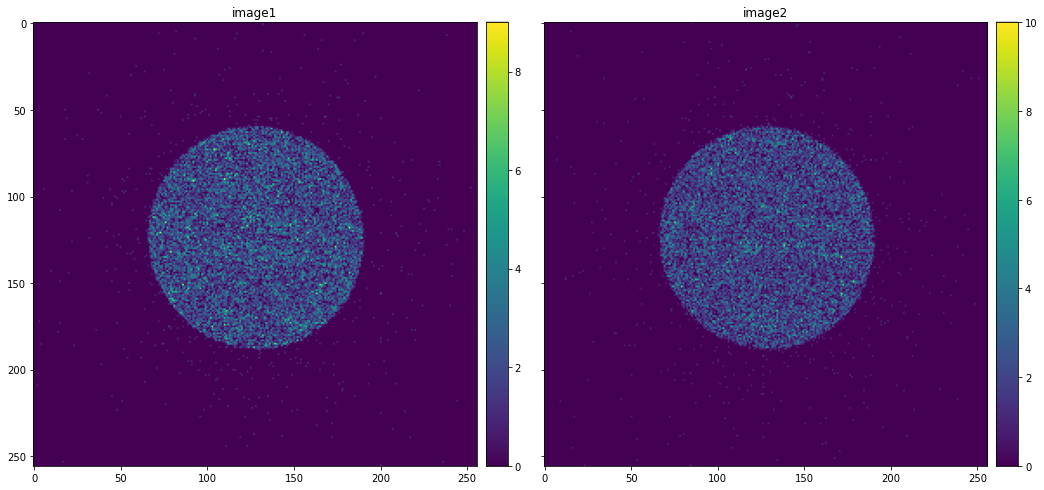

In [25]:
fig =plt.figure(1, figsize=(60, 30))
grid=AxesGrid(fig, 236, nrows_ncols=(1, 2),
             axes_pad=0.5,
             share_all=False,
             cbar_location="right",
             cbar_mode="each",
             cbar_size="5%",
             cbar_pad="2%")
im=grid[0].imshow(diff_data[0,0,:,:], cmap=plt.cm.viridis)
grid.cbar_axes[0].colorbar(im)
grid[0].set_title("image1")
im=grid[1].imshow(diff_data[0,1,:,:], cmap=plt.cm.viridis)
grid.cbar_axes[1].colorbar(im)
grid[1].set_title("image2")

C:\Users\sning\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.
  # This is added back by InteractiveShellApp.init_path()


Text(0.5, 1.0, 'image1')

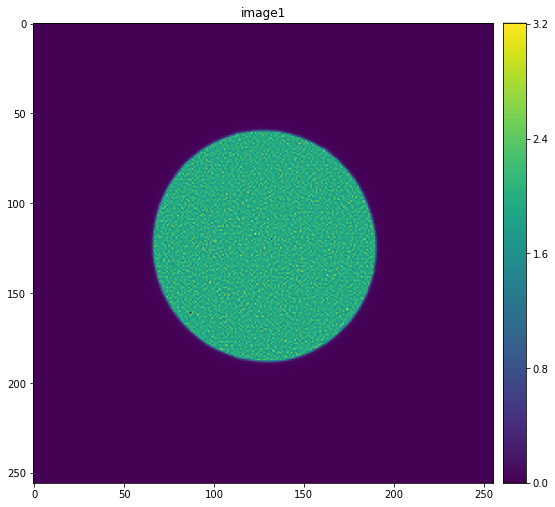

In [26]:
pacbed = np.average(diff_data, axis=(0,1))
fig =plt.figure(1, figsize=(30, 30))
grid=AxesGrid(fig, 236, nrows_ncols=(1, 1),
             axes_pad=0.5,
             share_all=False,
             cbar_location="right",
             cbar_mode="each",
             cbar_size="5%",
             cbar_pad="2%")
im=grid[0].imshow(pacbed, cmap=plt.cm.viridis)
grid.cbar_axes[0].colorbar(im)
grid[0].set_title("image1")

C:\Users\sning\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.
  from ipykernel import kernelapp as app
C:\Users\sning\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.
C:\Users\sning\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.l

Text(0.5, 1.0, 'image3')

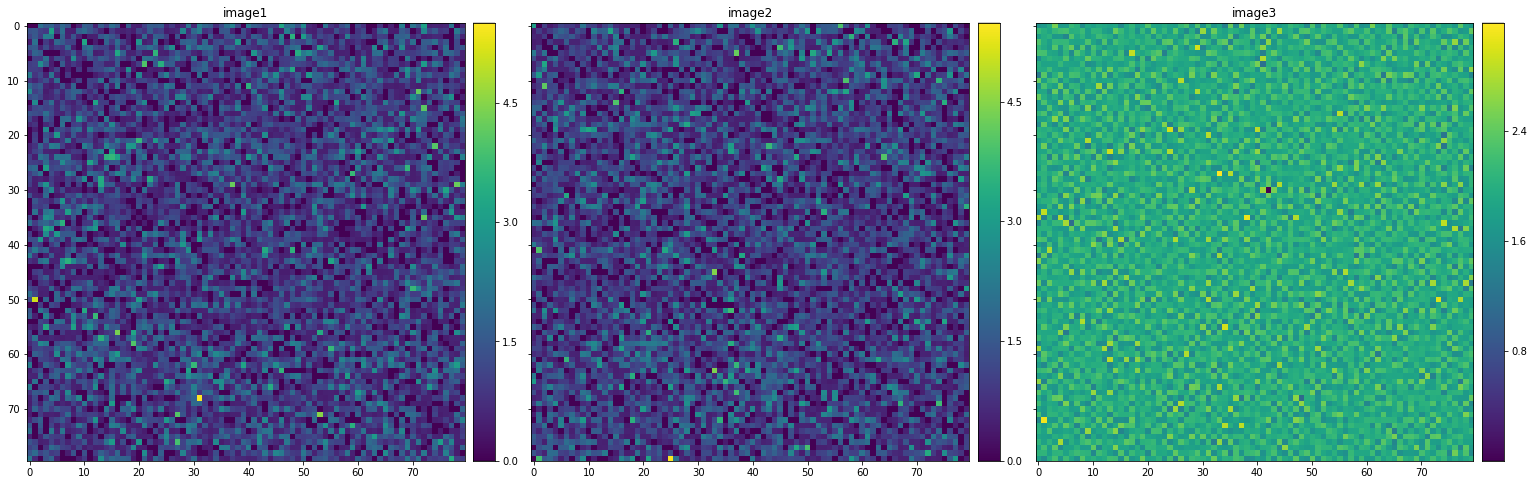

In [27]:
upperb = 90
lowerb = 170
leftb = 90
rightb = 170
pacbed1 = pacbed[upperb:lowerb, leftb:rightb]+0.001
fig =plt.figure(1, figsize=(90, 30))
grid=AxesGrid(fig, 236, nrows_ncols=(1, 3),
             axes_pad=0.5,
             share_all=False,
             cbar_location="right",
             cbar_mode="each",
             cbar_size="5%",
             cbar_pad="2%")
im=grid[0].imshow(diff_data[3,0,upperb:lowerb, leftb:rightb]/pacbed1, cmap=plt.cm.viridis)
grid.cbar_axes[0].colorbar(im)
grid[0].set_title("image1")
im=grid[1].imshow(diff_data[3,1,upperb:lowerb, leftb:rightb]/pacbed1, cmap=plt.cm.viridis)
grid.cbar_axes[1].colorbar(im)
grid[1].set_title("image2")
im=grid[2].imshow(pacbed1, cmap=plt.cm.viridis)
grid.cbar_axes[2].colorbar(im)
grid[2].set_title("image3")

In [28]:
r_val =10
pacbed1 = pacbed[upperb:lowerb, leftb:rightb]+0.01
pacbed2 = pacbed[upperb+r_val:lowerb-r_val, leftb+r_val:rightb-r_val]+0.01
image = np.float32(diff_data[0,1,upperb:lowerb, leftb:rightb]/pacbed1)
template = np.float32(diff_data[0, 0,upperb+r_val:lowerb-r_val, leftb+r_val:rightb-r_val]/pacbed2)
res1 = cv2.matchTemplate(image,template,cv2.TM_CCOEFF_NORMED)
image = diff_data[0,2,upperb:lowerb, leftb:rightb]
template = diff_data[0, 1,upperb+r_val:lowerb-r_val, leftb+r_val:rightb-r_val]
res2 = cv2.matchTemplate(image,template,cv2.TM_CCOEFF_NORMED)
image = diff_data[0,3,upperb:lowerb, leftb:rightb]
template = diff_data[0, 2,upperb+r_val:lowerb-r_val, leftb+r_val:rightb-r_val]
res3 = cv2.matchTemplate(image,template,cv2.TM_CCOEFF_NORMED)
image = diff_data[0,4,upperb:lowerb, leftb:rightb]
template = diff_data[0, 3,upperb+r_val:lowerb-r_val, leftb+r_val:rightb-r_val]
res4 = cv2.matchTemplate(image,template,cv2.TM_CCOEFF_NORMED)
image = diff_data[0,5,upperb:lowerb, leftb:rightb]
template = diff_data[0, 4,upperb+r_val:lowerb-r_val, leftb+r_val:rightb-r_val]
res5 = cv2.matchTemplate(image,template,cv2.TM_CCOEFF_NORMED)
image = diff_data[0,6,upperb:lowerb, leftb:rightb]
template = diff_data[0, 5,upperb+r_val:lowerb-r_val, leftb+r_val:rightb-r_val]
res6 = cv2.matchTemplate(image,template,cv2.TM_CCOEFF_NORMED)

C:\Users\sning\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\sning\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.
  del sys.path[0]
C:\Users\sning\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases 

Text(0.5, 1.0, 'correlation matrix6')

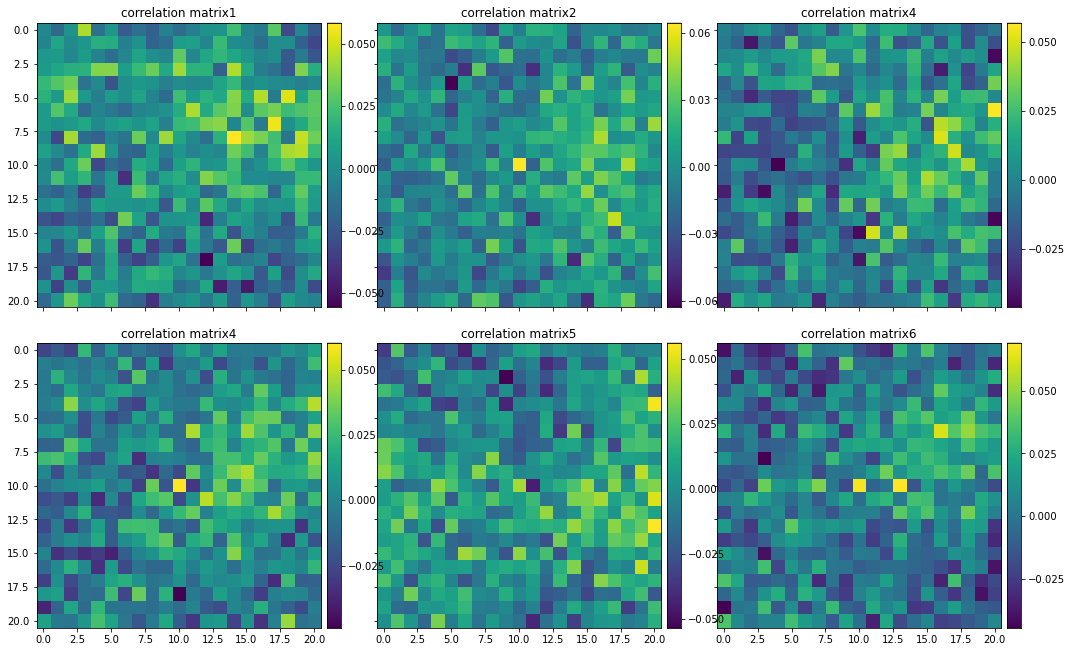

In [29]:
fig =plt.figure(1, figsize=(60, 40))
grid=AxesGrid(fig, 236, nrows_ncols=(2, 3),
             axes_pad=0.5,
             share_all=False,
             cbar_location="right",
             cbar_mode="each",
             cbar_size="5%",
             cbar_pad="2%")
im=grid[0].imshow(res1, cmap=plt.cm.viridis)
grid.cbar_axes[0].colorbar(im)
grid[0].set_title("correlation matrix1")
im=grid[1].imshow(res2, cmap=plt.cm.viridis)
grid.cbar_axes[1].colorbar(im)
grid[1].set_title("correlation matrix2")
im=grid[2].imshow(res3, cmap=plt.cm.viridis)
grid.cbar_axes[2].colorbar(im)
grid[2].set_title("correlation matrix4")
im=grid[3].imshow(res4, cmap=plt.cm.viridis)
grid.cbar_axes[3].colorbar(im)
grid[3].set_title("correlation matrix4")
im=grid[4].imshow(res5, cmap=plt.cm.viridis)
grid.cbar_axes[4].colorbar(im)
grid[4].set_title("correlation matrix5")
im=grid[5].imshow(res6, cmap=plt.cm.viridis)
grid.cbar_axes[5].colorbar(im)
grid[5].set_title("correlation matrix6")

In [30]:
resx = np.zeros_like(res1)
for i in range(240):
    for j in range(255):
        image = np.float32(diff_data[i,j+1,upperb:lowerb, leftb:rightb])
        template = np.float32(diff_data[i,j,upperb+r_val:lowerb-r_val, leftb+r_val:rightb-r_val])
        resx += cv2.matchTemplate(image,template,cv2.TM_CCOEFF_NORMED)
resy = np.zeros_like(res1)
for i in range(239):
    for j in range(256):
        image = np.float32(diff_data[i+1,j,upperb:lowerb, leftb:rightb])
        template = np.float32(diff_data[i,j,upperb+r_val:lowerb-r_val, leftb+r_val:rightb-r_val])
        resy += cv2.matchTemplate(image,template,cv2.TM_CCOEFF_NORMED)

C:\Users\sning\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\sning\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.
  del sys.path[0]


Text(0.5, 1.0, 'averaged correlation matrix')

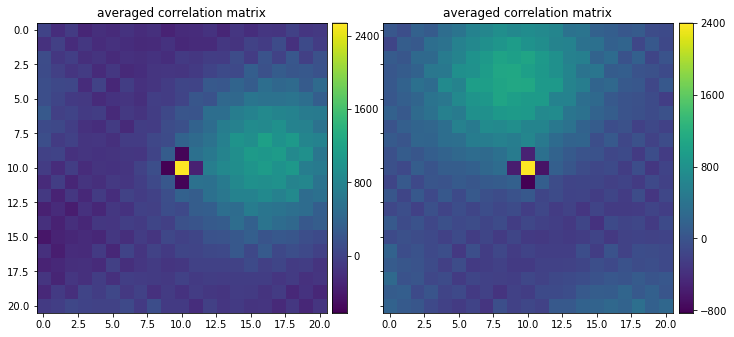

In [31]:
fig =plt.figure(1, figsize=(40, 20))
grid=AxesGrid(fig, 236, nrows_ncols=(1, 2),
             axes_pad=0.5,
             share_all=False,
             cbar_location="right",
             cbar_mode="each",
             cbar_size="5%",
             cbar_pad="2%")
im=grid[0].imshow(resx, cmap=plt.cm.viridis)
grid.cbar_axes[0].colorbar(im)
grid[0].set_title("averaged correlation matrix")
im=grid[1].imshow(resy, cmap=plt.cm.viridis)
grid.cbar_axes[1].colorbar(im)
grid[1].set_title("averaged correlation matrix")

In [32]:
resx = np.zeros_like(res1)
for i in range(240):
    for j in range(255):
        image = np.float32(diff_data[i,j+1,upperb:lowerb, leftb:rightb]/pacbed1)
        template = np.float32(diff_data[i,j,upperb+r_val:lowerb-r_val, leftb+r_val:rightb-r_val]/pacbed2)
        resx += cv2.matchTemplate(image,template,cv2.TM_CCOEFF_NORMED)
resy = np.zeros_like(res1)
for i in range(239):
    for j in range(256):
        image = np.float32(diff_data[i+1,j,upperb:lowerb, leftb:rightb]/pacbed1)
        template = np.float32(diff_data[i,j,upperb+r_val:lowerb-r_val, leftb+r_val:rightb-r_val]/pacbed2)
        resy += cv2.matchTemplate(image,template,cv2.TM_CCOEFF_NORMED)

C:\Users\sning\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\sning\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.
  del sys.path[0]


Text(0.5, 1.0, 'averaged correlation matrix')

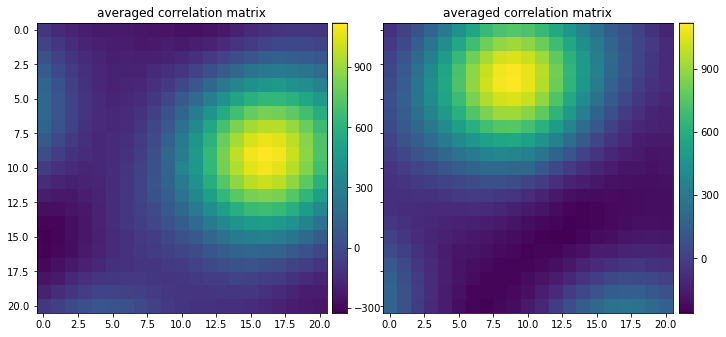

In [33]:
fig =plt.figure(1, figsize=(40, 20))
grid=AxesGrid(fig, 236, nrows_ncols=(1, 2),
             axes_pad=0.5,
             share_all=False,
             cbar_location="right",
             cbar_mode="each",
             cbar_size="5%",
             cbar_pad="2%")
im=grid[0].imshow(resx, cmap=plt.cm.viridis)
grid.cbar_axes[0].colorbar(im)
grid[0].set_title("averaged correlation matrix")
im=grid[1].imshow(resy, cmap=plt.cm.viridis)
grid.cbar_axes[1].colorbar(im)
grid[1].set_title("averaged correlation matrix")

In [34]:
#overall fitting
idx1 = np.unravel_index(np.argmax(resx), resx.shape)
idx2 = np.unravel_index(np.argmax(resy), resy.shape)
x_pos1 = idx1[1]
y_pos1 = idx1[0]
x_pos2 = idx2[1]
y_pos2 = idx2[0]
#fit the first frame
params=[x_pos1, y_pos1, 2.0, 2.0, 0, resx[idx1], 0]
params=GaussianFittingPro(resx, params)
shift1 = params[0:2] - r_val
#fit the second frame
params=[x_pos2, y_pos2, 2.0, 2.0, 0, resy[idx2], 0]
params=GaussianFittingPro(resy, params)
shift2 = params[0:2] - r_val
print(shift1)
print(shift2)

[ 6.21415923 -0.90648962]
[-1.28421868 -6.50105522]


In [35]:
#ROI fitting
box = 4
idx1 = np.unravel_index(np.argmax(resx), resx.shape)
idx2 = np.unravel_index(np.argmax(resy), resy.shape)
x_pos1 = idx1[1]
y_pos1 = idx1[0]
x_pos2 = idx2[1]
y_pos2 = idx2[0]
#first frame
params=[box, box, 2.0, resx[idx1], 0]
params=GaussianFitting(resx[y_pos1-box:y_pos1+box,x_pos1-box:x_pos1+box], params)
shift1=np.array([params[0] + x_pos1, params[1] + y_pos1])-box - r_val
#second frame
params=[box, box, 2.0, resy[idx2], 0]
params=GaussianFitting(resy[y_pos2-box:y_pos2+box,x_pos2-box:x_pos2+box], params)
shift2=np.array([params[0] + x_pos2, params[1] + y_pos2])-box - r_val
print(shift1)
print(shift2)

[ 6.16827101 -0.90115765]
[-1.23493354 -6.48309792]


In [36]:
#x direction is:
print(0.9969838/(np.sqrt(np.sum(np.square(shift1)))*0.031/62.2))
print(shift1)
print(shift2)

320.8982412144796
[ 6.16827101 -0.90115765]
[-1.23493354 -6.48309792]


In [37]:
#The length of fast scanning direction is 1.595174 angstrom
modulus = 0.9969838/np.sqrt(np.sum(np.square(shift1)))
shift1= np.asarray(shift1)*modulus
shift2= np.asarray(shift2)*modulus
print(shift1)
print(shift2)

[ 0.98651136 -0.14412503]
[-0.19750688 -1.03686264]


In [38]:
resx = np.zeros_like(res1)
resy = np.zeros_like(res1)
for i in range(64):
    for j in range(64):
        image = np.float32(diff_data[i+96,j+97,upperb:lowerb, leftb:rightb]/pacbed1)
        template = np.float32(diff_data[i+96,j+96,upperb+r_val:lowerb-r_val, leftb+r_val:rightb-r_val]/pacbed2)
        resx += cv2.matchTemplate(image,template,cv2.TM_CCOEFF_NORMED)
for i in range(64):
    for j in range(64):
        image = np.float32(diff_data[i+97,j+96,upperb:lowerb, leftb:rightb]/pacbed1)
        template = np.float32(diff_data[i+96,j+96,upperb+r_val:lowerb-r_val, leftb+r_val:rightb-r_val]/pacbed2)
        resy += cv2.matchTemplate(image,template,cv2.TM_CCOEFF_NORMED)

C:\Users\sning\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\sning\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.
  del sys.path[0]


Text(0.5, 1.0, 'averaged correlation matrix')

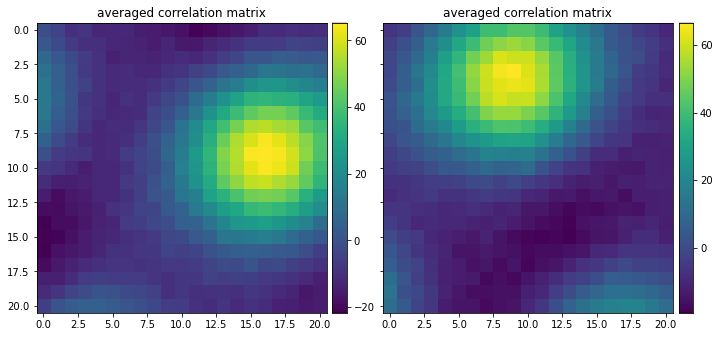

In [39]:
fig =plt.figure(1, figsize=(40, 20))
grid=AxesGrid(fig, 236, nrows_ncols=(1, 2),
             axes_pad=0.5,
             share_all=False,
             cbar_location="right",
             cbar_mode="each",
             cbar_size="5%",
             cbar_pad="2%")
im=grid[0].imshow(resx, cmap=plt.cm.viridis)
grid.cbar_axes[0].colorbar(im)
grid[0].set_title("averaged correlation matrix")
im=grid[1].imshow(resy, cmap=plt.cm.viridis)
grid.cbar_axes[1].colorbar(im)
grid[1].set_title("averaged correlation matrix")

In [40]:
#overall fitting
idx1 = np.unravel_index(np.argmax(resx), resx.shape)
idx2 = np.unravel_index(np.argmax(resy), resy.shape)
x_pos1 = idx1[1]
y_pos1 = idx1[0]
x_pos2 = idx2[1]
y_pos2 = idx2[0]
#fit the first frame
params=[x_pos1, y_pos1, 2.0, 2.0, 0, resx[idx1], 0]
params=GaussianFittingPro(resx, params)
shift1 = params[0:2] - r_val
#fit the second frame
params=[x_pos2, y_pos2, 2.0, 2.0, 0, resy[idx2], 0]
params=GaussianFittingPro(resy, params)
shift2 = params[0:2] - r_val
print(shift1)
print(shift2)

[ 6.22151508 -0.91407824]
[-1.34956129 -6.51965993]


In [41]:
#x direction is:
print(0.9969838/(np.sqrt(np.sum(np.square(shift1)))*0.031/62.2))
print(shift1)
print(shift2)

318.1142649693929
[ 6.22151508 -0.91407824]
[-1.34956129 -6.51965993]


In [42]:
#The length of fast scanning direction is 1.595174 angstrom
modulus = 0.9969838/np.sqrt(np.sum(np.square(shift1)))
shift1= np.asarray(shift1)*modulus
shift2= np.asarray(shift2)*modulus
print(shift1)
print(shift2)

[ 0.98639443 -0.14492317]
[-0.21396713 -1.03366401]


In [23]:
#sub-pixel refinement

# Define the motion model
warp_mode = cv2.MOTION_TRANSLATION

# Specify the number of iterations.
number_of_iterations = 100;

# Specify the threshold of the increment
# in the correlation coefficient between two iterations
termination_eps = 1e-10;

# Define termination criteria
criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, number_of_iterations,  termination_eps)

In [12]:
# Define 2x3 matrices and initialize the matrix to identity
warp_matrix = np.eye(2, 3, dtype=np.float32)
warp_matrix[0,2] = 4.0
warp_matrix[1,2] = -1.0
# Select the image and template 
image = diff_data[1,leftb:rightb,upperb:lowerb]
template = diff_data[0,leftb:rightb,upperb:lowerb]
# Start to refine the matrix.
warp_matrix = cv2.findTransformECC (image, template, warp_matrix, warp_mode, criteria, None, 1)

In [13]:
x_disp = []
y_disp = []
shift_val = 256*50
for i in range(254):
    image = diff_data[i+shift_val+1,leftb:rightb,upperb:lowerb]
    template = diff_data[i+shift_val,leftb:rightb,upperb:lowerb]
    # Define 2x3 matrices and initialize the matrix to identity
    warp_matrix = np.eye(2, 3, dtype=np.float32)
    warp_matrix[0,2] = 4.0
    warp_matrix[1,2] = -1.0
    warp_matrix = cv2.findTransformECC (image, template, warp_matrix, warp_mode, criteria, None, 1)
    x_disp.append(warp_matrix[1][0, 2])
    y_disp.append(warp_matrix[1][1, 2])

In [14]:
x_disp = np.asarray(x_disp)
y_disp = np.asarray(y_disp)
print(np.average(x_disp))
print(np.average(y_disp))

4.2307787
-0.8271251


In [17]:
#the iteration does not come to convegence.
warp_matrix = np.eye(2, 3, dtype=np.float32)
warp_matrix[0,2] = -1.0
warp_matrix[1,2] = -5.0
# Select the image and template 
image = diff_data[256*50,leftb:rightb,upperb:lowerb]
template = diff_data[256*49,leftb:rightb,upperb:lowerb]
# Start to refine the matrix.
warp_matrix = cv2.findTransformECC (image, template, warp_matrix, warp_mode, criteria, None, 1)
#we use the center of mass to fit the center position or use the parabolic approximation.

In [18]:
x_disp = []
y_disp = []
shift_val = 256*50
for i in range(256):
    image = diff_data[i+shift_val,leftb:rightb,upperb:lowerb]
    template = diff_data[i+shift_val-256,leftb:rightb,upperb:lowerb]
    # Define 2x3 matrices and initialize the matrix to identity
    warp_matrix = np.eye(2, 3, dtype=np.float32)
    warp_matrix[0,2] = -1.0
    warp_matrix[1,2] = -5.0
    warp_matrix = cv2.findTransformECC (image, template, warp_matrix, warp_mode, criteria, None, 1)
    x_disp.append(warp_matrix[1][0, 2])
    y_disp.append(warp_matrix[1][1, 2])
x_disp = np.asarray(x_disp)
y_disp = np.asarray(y_disp)
print(np.average(x_disp))
print(np.average(y_disp))

-1.1636161
-4.6895213


In [29]:
x_disp = []
y_disp = []
for j in range(50):
    shift_val = 256*(40+j)
    for i in range(256):
        image = diff_data[i+shift_val,leftb:rightb,upperb:lowerb]
        template = diff_data[i+shift_val-256,leftb:rightb,upperb:lowerb]
        # Define 2x3 matrices and initialize the matrix to identity
        warp_matrix = np.eye(2, 3, dtype=np.float32)
        warp_matrix[0,2] = -1.0
        warp_matrix[1,2] = -5.0
        warp_matrix = cv2.findTransformECC (image, template, warp_matrix, warp_mode, criteria, None, 1)
        x_disp.append(warp_matrix[1][0, 2])
        y_disp.append(warp_matrix[1][1, 2])

error: OpenCV(4.4.0) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-nxx381if\opencv\modules\video\src\ecc.cpp:572: error: (-7:Iterations do not converge) The algorithm stopped before its convergence. The correlation is going to be minimized. Images may be uncorrelated or non-overlapped in function 'cv::findTransformECC'


In [30]:
x_disp = np.asarray(x_disp)
y_disp = np.asarray(y_disp)
print(np.average(x_disp))
print(np.average(y_disp))

-0.94018227
-4.877617


In [38]:
max_loc = np.where(res == np.amax(res))
y_pos = max_loc[0][0]
x_pos = max_loc[1][0]
sum_val = np.sum(np.shape(res[y_pos-1:y_pos+2,x_pos-1:x_pos+2]))

In [39]:
x_sum =0
y_sum =0
for i in range(3):
    for j in range(3):
        x_sum+=res[y_pos+i-1,x_pos+j-1]*(j-1)
        y_sum+=res[y_pos+i-1,x_pos+j-1]*(i-1)
x_sum = x_sum/sum_val
y_sum = y_sum/sum_val
x_pos += x_sum
y_pos += y_sum
print(5 - x_pos)
print(5 - y_pos)

2.406643549601237
4.033798853556315


In [31]:
fliped = np.flip(diff_data, axis=1)

C:\Users\sning\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\sning\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.
  del sys.path[0]


Text(0.5, 1.0, 'image2')

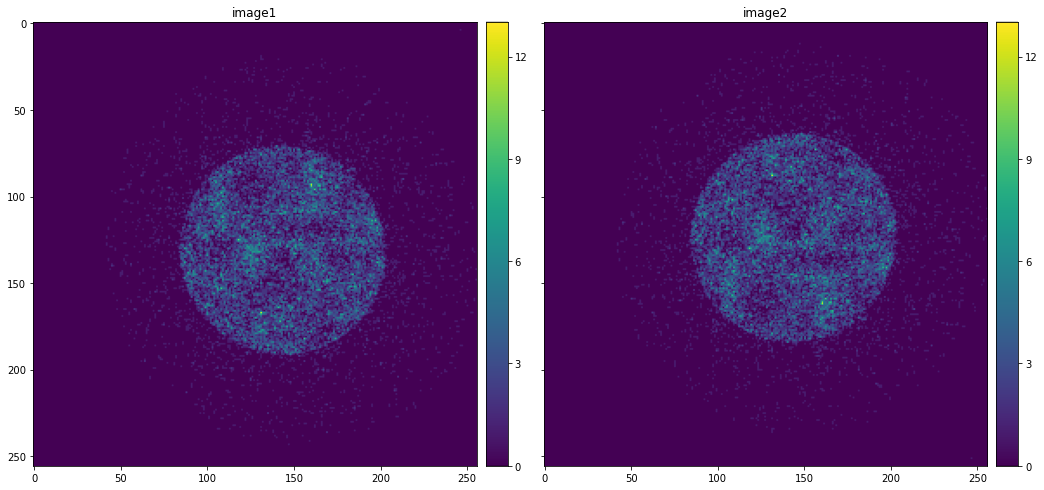

In [32]:
fig =plt.figure(1, figsize=(60, 30))
grid=AxesGrid(fig, 236, nrows_ncols=(1, 2),
             axes_pad=0.5,
             share_all=False,
             cbar_location="right",
             cbar_mode="each",
             cbar_size="5%",
             cbar_pad="2%")
im=grid[0].imshow(diff_data[0,:,:], cmap=plt.cm.viridis)
grid.cbar_axes[0].colorbar(im)
grid[0].set_title("image1")
im=grid[1].imshow(fliped[0,:,:], cmap=plt.cm.viridis)
grid.cbar_axes[1].colorbar(im)
grid[1].set_title("image2")

In [ ]:
np.save("E:/50flip.npy", fliped)